# 数据预处理

In [1]:
! cd /d D:\jupyter_notebook\bigdata_homework
! python prepro.py

The accuracy of Dtree is 97.36842105263158


# 构造决策树分类器

In [2]:
! python decisiontree.py

The accuracy of Dtree is 97.36842105263158


C:\Users\HASEE\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# 组合模型

In [3]:
! python ensemble.py

the accuracy of Adaboost is 78.94736842105263%
The accuracy of GBDT model is 97.36842105263158
The accuracy of RandomForest model is 97.36842105263158%


C:\Users\HASEE\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


# 完成习题

> 分别列出三种组合模型的训练结果

In [5]:
! python ensemble.py

> 比较三种组合分类器的精度

In [4]:
# 导入数据并预处理
import numpy as np
from sklearn.datasets import load_iris
iris=load_iris().data
iris_target=load_iris().target
iris=iris[iris_target != 2]
iris_target = iris_target[iris_target != 2]
from sklearn.preprocessing import MinMaxScaler
MinMaxTransformer=MinMaxScaler()
MinMaxTransformer.fit(iris)
iris_transformed=MinMaxTransformer.transform(iris)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(iris_transformed, iris_target, random_state=5, test_size=.5)

In [5]:
# adaboost分类器精度
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
ada=AdaBoostClassifier(base_estimator=lr)
ada.fit(X_train, y_train)
predict_labels=ada.predict((X_test))
accuracy=np.mean(predict_labels==(y_test))*100
accuracy

C:\Users\HASEE\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


80.0

In [6]:
# adaboost分类器f1-score
from sklearn import metrics
metrics.f1_score(y_test, predict_labels, average=None)

array([0.7826087 , 0.81481481])

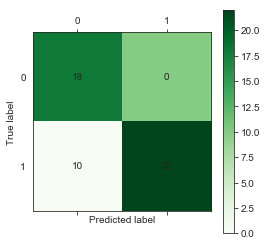

In [9]:
# adaboost分类器混淆矩阵
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predict_labels)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
plt.matshow(cm,cmap=plt.cm.Greens)
plt.colorbar()
for x in range(len(cm)):
    for y in range(len(cm)):
        plt.annotate(cm[x,y],xy=(x,y),horizontalalignment='center',verticalalignment='center')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [15]:
# GBDT分类器精度
from sklearn.ensemble import GradientBoostingClassifier
gdbt=GradientBoostingClassifier()
gdbt.fit(X_train, y_train)
predict_y=gdbt.predict((X_test))
accuracy=np.mean(predict_y==y_test)*100
accuracy

100.0

In [20]:
# GBDT分类器f1-score
from sklearn import metrics
metrics.f1_score(y_test, predict_y, average=None)

array([1., 1.])

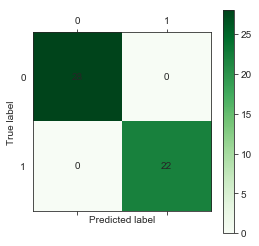

In [17]:
# GBDT分类器混淆矩阵
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predict_y)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
plt.matshow(cm,cmap=plt.cm.Greens)
plt.colorbar()
for x in range(len(cm)):
    for y in range(len(cm)):
        plt.annotate(cm[x,y],xy=(x,y),horizontalalignment='center',verticalalignment='center')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [18]:
# 随机森林分类器精度
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train, y_train)
predict_y=rf.predict((X_test))
accuracy=np.mean(predict_y==y_test)*100
accuracy

100.0

In [21]:
# 随机森林分类器f1-score
from sklearn import metrics
metrics.f1_score(y_test, predict_y, average=None)

array([1., 1.])

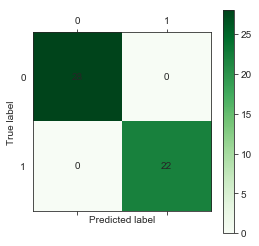

In [19]:
# 随机森林分类器混淆矩阵
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predict_y)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
plt.matshow(cm,cmap=plt.cm.Greens)
plt.colorbar()
for x in range(len(cm)):
    for y in range(len(cm)):
        plt.annotate(cm[x,y],xy=(x,y),horizontalalignment='center',verticalalignment='center')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

> 比较三种组合分类器的效率

In [27]:
# 训练100次adaboost算法耗时
from timeit import timeit
t = timeit('ada_boost()', 'from ensemble import ada_boost', number=100)
t

7.606000600000016

In [28]:
# 训练100次gbdt算法耗时
from timeit import timeit
t = timeit('gbdt()', 'from ensemble import gbdt', number=100)
t

14.3532285

In [29]:
# 训练100次随机森林算法耗时
from timeit import timeit
t = timeit('rf()', 'from ensemble import rf', number=100)
t

1.2643783999999982

> 利用网格搜索和随机搜索对三种组合模型进行参数调优

In [30]:
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
ada=AdaBoostClassifier(base_estimator=lr)
#候选参数
tuned_parameters = [{'n_estimators': [10, 50, 100], 'learning_rate': [.5, 1, 2],
'algorithm': ['SAMME', 'SAMME.R']}]
clf=GridSearchCV(ada, tuned_parameters)
clf.fit(X_train, y_train)
#输出最优参数
print("Best parameters: ")
print(clf.best_params_)

C:\Users\HASEE\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\HASEE\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Best parameters: 
{'algorithm': 'SAMME', 'learning_rate': 2, 'n_estimators': 10}


In [31]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
gdbt=GradientBoostingClassifier()
#候选参数
tuned_parameters = [{'loss': ['deviance', 'exponential'], 'learning_rate': [.1, .2, .05],
'n_estimators': [10, 50, 100], 'subsample': [.5, 1], 'max_depth': [2, 3, 5]}]
clf=GridSearchCV(gdbt, tuned_parameters)
clf.fit(X_train, y_train)
#输出最优参数
print("Best parameters: ")
print(clf.best_params_)

Best parameters: 
{'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 2, 'n_estimators': 10, 'subsample': 0.5}


In [34]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
#候选参数
tuned_parameters = [{'criterion': ['gini', 'entropy'], 'max_depth': [1, 2, 3],
'n_estimators': [10, 50, 100], 'class_weight': ['balanced', 'balanced_subsample', None]}]
clf=GridSearchCV(rf, tuned_parameters)
clf.fit(X_train, y_train)
#输出最优参数
print("Best parameters: ")
print(clf.best_params_)

Best parameters: 
{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 1, 'n_estimators': 10}


In [43]:
from scipy.stats import randint as sp_randint
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
rf=RandomForestClassifier(n_estimators=20)
param_dist={"max_depth":[1,None],
            "max_features":sp_randint(1,4),
            "min_samples_split":sp_randint(2,4),
            "min_samples_leaf":sp_randint(1,4),
            "bootstrap":[True,False],
            "criterion":['gini','entropy'],
            "class_weight": ['balanced', 'balanced_subsample', None]
            }
n_iter_search=20
random_search=RandomizedSearchCV(rf,param_distributions=param_dist,n_iter=n_iter_search)
random_search.fit(X_train,y_train)
random_search.best_params_

{'bootstrap': False,
 'class_weight': 'balanced_subsample',
 'criterion': 'entropy',
 'max_depth': 1,
 'max_features': 1,
 'min_samples_leaf': 3,
 'min_samples_split': 2}